In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from functools import reduce

In [ ]:
def get_sources(source_list):
    '''
    this function takes a list of urls, ID's their format, requests dataset from source,
    converts data into a dataframe, then saves it as a pickled file.
    '''
    for counter, source in enumerate(source_list):
        name = str(counter) + '_df.pkl'
        
        if source.endswith('.json'):
            response = requests.get(source)
            data = response.json()
            json_df = pd.DataFrame(data)            
            json_df.to_pickle(name)
            print(name, ' created using this source: ', source)
        
        if source.endswith('.csv'):
            csv = pd.read_csv(source)
            csv.to_pickle(name)
            
        else:
            response = requests.get(source, allow_redirects=True)
            with open('excel_data.xlsx', 'wb') as file:
                file.write(response.content)
            
            #using pd.read_excel on a multi-spreadsheet xls yields a dictionary
            excel_dict = pd.read_excel('excel_data.xlsx', sheet_name=None)
            name = str(counter) + '_df.pkl'
            #can ID sheetnames by evaluating keys
            #print(excel_dict.keys())
            if len(excel_dict.keys()) > 1:
                print('There are more than one sheet in this .csv file.','\n',
                      source, '\n', excel_dict.keys())
                myInput = input('Which of these sheets do  you want to use?')
                #print(myInput)
                excel_specified_sheet = excel_dict[myInput]
                excel_specified_sheet.to_pickle(name)
            else:
                excel_dict.to_pickle(name)
            
            print(name,' created using this source', source)

In [2]:
cases_by_county = 'Biobot Data/cases_by_county.csv'
cases_county = pd.read_csv(cases_by_county, parse_dates=['date'])

In [3]:
cases_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     15000 non-null  datetime64[ns]
 1   rolling_average_cases_per_100k_centered  15000 non-null  float64       
 2   region                                   15000 non-null  object        
 3   state                                    15000 non-null  object        
 4   county_fips_code                         15000 non-null  int64         
 5   county_name                              15000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 703.2+ KB


In [59]:
cases_county.county_fips_code.nunique()

30

In [4]:
cases_by_region = 'Biobot Data/cases_by_region.csv'
cases_region = pd.read_csv(cases_by_region, parse_dates=['date'])

In [5]:
cases_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     2500 non-null   datetime64[ns]
 1   rolling_average_cases_per_100k_centered  2500 non-null   float64       
 2   region                                   2500 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 58.7+ KB


In [6]:
wastewater_by_county = 'Biobot Data/wastewater_by_county.csv'
wastewater_county = pd.read_csv(wastewater_by_county, parse_dates=['sampling_week'])

In [7]:
wastewater_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   sampling_week                             1267 non-null   datetime64[ns]
 1   normalized_concentration_rolling_average  1267 non-null   float64       
 2   population                                1267 non-null   object        
 3   region                                    1267 non-null   object        
 4   state                                     1267 non-null   object        
 5   county_fips_code                          1267 non-null   int64         
 6   county_name                               1267 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 69.4+ KB


In [60]:
wastewater_county.county_fips_code.nunique()

30

In [8]:
wastewater_by_region = 'Biobot Data/wastewater_by_region.csv'
wastewater_region = pd.read_csv(wastewater_by_region, parse_dates=['sampling_week'])

In [9]:
wastewater_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   sampling_week                             315 non-null    datetime64[ns]
 1   normalized_concentration_rolling_average  315 non-null    float64       
 2   population                                315 non-null    object        
 3   region                                    315 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 10.0+ KB


In [10]:
wastewater_county['date'] = wastewater_county['sampling_week']

In [ ]:
cases_data_frames = [cases_county, cases_region]
wastewater_data_frames = [wastewater_county, wastewater_region]

In [230]:
county_merged = cases_county.reset_index().merge(wastewater_county)

In [231]:
county_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1250
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   index                                     1251 non-null   int64         
 1   date                                      1251 non-null   datetime64[ns]
 2   rolling_average_cases_per_100k_centered   1251 non-null   float64       
 3   region                                    1251 non-null   object        
 4   state                                     1251 non-null   object        
 5   county_fips_code                          1251 non-null   int64         
 6   county_name                               1251 non-null   object        
 7   sampling_week                             1251 non-null   datetime64[ns]
 8   normalized_concentration_rolling_average  1251 non-null   float64       
 9   population                    

In [232]:
county_merged.columns

Index(['index', 'date', 'rolling_average_cases_per_100k_centered', 'region',
       'state', 'county_fips_code', 'county_name', 'sampling_week',
       'normalized_concentration_rolling_average', 'population'],
      dtype='object')

<AxesSubplot:xlabel='date', ylabel='normalized_concentration_rolling_average'>

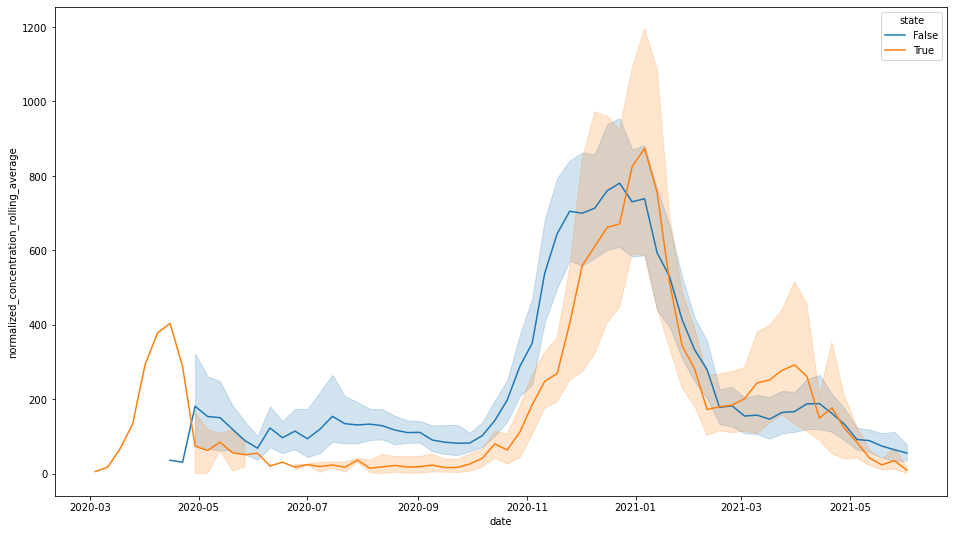

In [309]:
plt.figure(figsize=(16,9))
sns.lineplot(x='date', y='normalized_concentration_rolling_average', 
            data=county_merged, hue=(county_merged.state == 'MA'))

In [298]:
county_merged.head(10)

,date,rolling_average_cases_per_100k_centered,region,state,county_fips_code,county_name,normalized_concentration_rolling_average,population
sampling_week,,,,,,,,
2020-05-13,2020-05-13,12.358572,Midwest,IN,18089,Lake,124.219023,200000-500000
2020-05-20,2020-05-20,11.152140,Midwest,IN,18089,Lake,86.285771,200000-500000
2020-05-27,2020-05-27,10.210534,Midwest,IN,18089,Lake,66.981292,200000-500000
2020-06-03,2020-06-03,11.093289,Midwest,IN,18089,Lake,21.675411,200000-500000
2020-06-17,2020-06-17,7.268017,Midwest,IN,18089,Lake,43.899843,200000-500000
2020-06-24,2020-06-24,10.004558,Midwest,IN,18089,Lake,65.623157,100000-200000
2020-07-08,2020-07-08,14.241783,Midwest,IN,18089,Lake,145.255103,200000-500000
2020-07-15,2020-07-15,14.565459,Midwest,IN,18089,Lake,160.476485,200000-500000
2020-07-22,2020-07-22,14.918561,Midwest,IN,18089,Lake,172.795243,200000-500000


In [233]:
county_merged['sampling_week'].isnull().sum()

0

In [234]:
county_merged['sampling_week'].nunique()

66

In [235]:
county_merged['sampling_week'].dtype

dtype('<M8[ns]')

In [236]:
county_merged['sampling_week'].shape

(1251,)

In [237]:
county_merged['date'].isnull().sum()

0

In [238]:
for x in county_merged.columns:
    print(x, county_merged[x].isnull().sum())

index 0
date 0
rolling_average_cases_per_100k_centered 0
region 0
state 0
county_fips_code 0
county_name 0
sampling_week 0
normalized_concentration_rolling_average 0
population 0


In [239]:
def blank_check(df):
    ''' A method to check my column cells from a pandas DataFrame for whitespace blanks.'''
    return dict(zip(df.columns, [(df[x] == '').sum() for x in df.columns]))

In [240]:
for col, blanks in blank_check(county_merged).items():
    print(col, blanks)

index 0
date 0
rolling_average_cases_per_100k_centered 0
region 0
state 0
county_fips_code 0
county_name 0
sampling_week 0
normalized_concentration_rolling_average 0
population 0


In [241]:
county_merged[county_merged['state']=='MA']

,index,date,rolling_average_cases_per_100k_centered,region,state,county_fips_code,county_name,sampling_week,normalized_concentration_rolling_average,population
146,2164,2020-07-08,1.029032,Northeast,MA,25003,Berkshire,2020-07-08,23.265067,50000-100000
147,2171,2020-07-15,1.257706,Northeast,MA,25003,Berkshire,2020-07-15,15.510045,50000-100000
148,2192,2020-08-05,1.486380,Northeast,MA,25003,Berkshire,2020-08-05,5.836566,50000-100000
149,2199,2020-08-12,0.114337,Northeast,MA,25003,Berkshire,2020-08-12,0.000000,50000-100000
150,2213,2020-08-26,3.087097,Northeast,MA,25003,Berkshire,2020-08-26,0.000000,50000-100000
...,...,...,...,...,...,...,...,...,...,...
702,8465,2021-05-05,11.763976,Northeast,MA,25025,Suffolk,2021-05-05,102.059487,2000000-5000000
703,8472,2021-05-12,6.841587,Northeast,MA,25025,Suffolk,2021-05-12,69.625957,2000000-5000000
704,8479,2021-05-19,8.245446,Northeast,MA,25025,Suffolk,2021-05-19,50.628972,2000000-5000000
705,8486,2021-05-26,4.193804,Northeast,MA,25025,Suffolk,2021-05-26,38.508182,2000000-5000000


In [249]:
Mass_df = pd.DataFrame(county_merged[county_merged['state']=='MA'])
Mass_df.shape

(253, 8)

<AxesSubplot:xlabel='date', ylabel='normalized_concentration_rolling_average'>

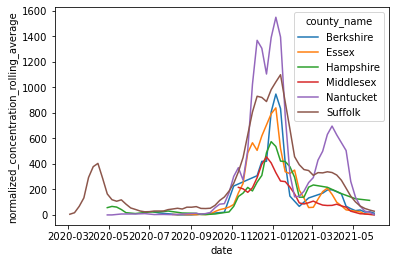

<Figure size 1512x648 with 0 Axes>

In [284]:
fig, axs = plt.subplots()
plt.figure(figsize=(21,9))
sns.lineplot(x='date', y='normalized_concentration_rolling_average', 
            data=Mass_df, hue=Mass_df.county_name, ax=axs)

In [251]:
Mass_df.county_name.nunique()

6

TypeError: no numeric data to plot

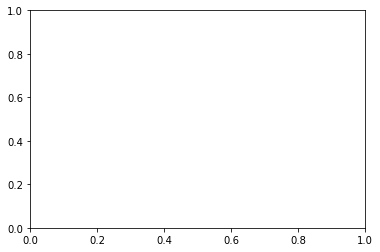

In [260]:
fig, ax = plt.subplots()
Mass_df.county_name.plot(y='normalized_concentration_rolling_average')

In [242]:
county_merged.shape

(1251, 10)

In [244]:
county_merged.set_index('sampling_week', drop=True, inplace=True)

In [245]:
county_merged.shape

(1251, 9)

In [246]:
county_merged.drop(columns='index', inplace=True)

In [247]:
county_merged.shape

(1251, 8)

<AxesSubplot:xlabel='date'>

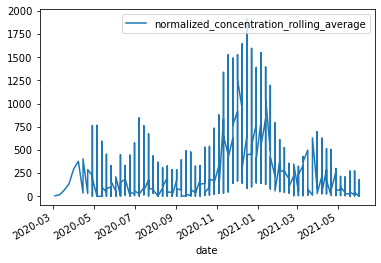

In [248]:
county_merged.plot(x='date', y='normalized_concentration_rolling_average')

In [ ]:
county_merged['date'].nunique()

In [19]:
test_df = county_merged.set_index('date', drop=True)

In [25]:
test_df.drop(columns='index', inplace=True)

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37530 entries, 2020-03-04 to 2021-06-02
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   rolling_average_cases_per_100k_centered   37530 non-null  float64       
 1   region_x                                  37530 non-null  object        
 2   state_x                                   37530 non-null  object        
 3   county_fips_code_x                        37530 non-null  int64         
 4   county_name_x                             37530 non-null  object        
 5   sampling_week                             37530 non-null  datetime64[ns]
 6   normalized_concentration_rolling_average  37530 non-null  float64       
 7   population                                37530 non-null  object        
 8   region_y                                  37530 non-null  object        
 9   state_y    

In [ ]:
test_df[['state_x','state_y']].shape

In [28]:
state_filter = test_df.loc[~(test_df['state_x'] == test_df['state_y'])]

In [33]:
state_filter[['state_x', 'state_y']]

,state_x,state_y
date,,
2020-03-04,IN,MA
2020-03-04,IL,MA
2020-03-04,MN,MA
2020-03-04,IN,MA
2020-03-04,PA,MA
...,...,...
2021-06-02,CA,FL
2021-06-02,CA,TN
2021-06-02,CA,VA


In [64]:
county_merged_by_fips = cases_county.reset_index().merge(wastewater_county, 
                                                         on='county_fips_code',
                                                         how='left').fillna(np.nan)

In [66]:
county_merged_by_fips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633500 entries, 0 to 633499
Data columns (total 14 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   index                                     633500 non-null  int64         
 1   date_x                                    633500 non-null  datetime64[ns]
 2   rolling_average_cases_per_100k_centered   633500 non-null  float64       
 3   region_x                                  633500 non-null  object        
 4   state_x                                   633500 non-null  object        
 5   county_fips_code                          633500 non-null  int64         
 6   county_name_x                             633500 non-null  object        
 7   sampling_week                             633500 non-null  datetime64[ns]
 8   normalized_concentration_rolling_average  633500 non-null  float64       
 9   population     

In [67]:
15000*1267

19005000

In [68]:
county_merged_by_fips.head(1)

,index,date_x,rolling_average_cases_per_100k_centered,region_x,state_x,county_fips_code,county_name_x,sampling_week,normalized_concentration_rolling_average,population,region_y,state_y,county_name_y,date_y
0,0,2020-01-26,0.0,Midwest,IN,18089,Lake,2020-05-13,124.219023,200000-500000,Midwest,IN,Lake,2020-05-13


In [69]:
state_filter_by_fips = county_merged_by_fips.loc[
    ~(county_merged_by_fips['state_x'] == county_merged_by_fips['state_y'])]

In [71]:
state_filter_by_fips.shape

(0, 14)

In [74]:
county_merged_by_fips.value_counts('state_y')

state_y
MA    128500
PA     92000
CA     70500
IN     40500
TN     32500
FL     29500
NV     29000
KY     27500
CT     27000
OR     24500
VA     24500
CO     24000
NY     19000
DE     18000
IL     17500
MN     15000
NJ     14000
dtype: int64

In [91]:
Mass_cases = pd.DataFrame(cases_county.loc[(cases_county.state == 'MA')])

In [92]:
Mass_wastewater = pd.DataFrame(wastewater_county.loc[(wastewater_county.state == 'MA')])

In [93]:
Mass_cases.shape

(3000, 6)

In [94]:
Mass_wastewater.shape

(257, 8)

In [95]:
Mass_wastewater['date'] = Mass_wastewater['sampling_week']

In [96]:
Mass_wastewater.drop(columns='sampling_week', inplace=True)

In [98]:
Mass_cases.columns

Index(['date', 'rolling_average_cases_per_100k_centered', 'region', 'state',
       'county_fips_code', 'county_name'],
      dtype='object')

In [99]:
Mass_wastewater.columns

Index(['normalized_concentration_rolling_average', 'population', 'region',
       'state', 'county_fips_code', 'county_name', 'date'],
      dtype='object')

In [206]:
Mass_merged_df = Mass_cases.reset_index().merge(Mass_wastewater, how='cross')

In [207]:
Mass_merged_df.shape

(771000, 14)

In [208]:
Mass_merged_df.columns

Index(['index', 'date_x', 'rolling_average_cases_per_100k_centered',
       'region_x', 'state_x', 'county_fips_code_x', 'county_name_x',
       'normalized_concentration_rolling_average', 'population', 'region_y',
       'state_y', 'county_fips_code_y', 'county_name_y', 'date_y'],
      dtype='object')

In [200]:
Mass_merged_df.isnull().sum()

index                                          0
date                                           0
rolling_average_cases_per_100k_centered        0
region                                         0
state                                          0
county_fips_code                               0
county_name                                    0
normalized_concentration_rolling_average    2747
population                                  2747
dtype: int64

In [221]:
x = Mass_merged_df.copy()
county_slice = x.loc[~(x.county_name_x == x.county_name_y)]

In [222]:
len(county_slice)

642500

In [229]:
county_slice.head(10)

,index,date_x,rolling_average_cases_per_100k_centered,region_x,state_x,county_fips_code_x,county_name_x,normalized_concentration_rolling_average,population,region_y,state_y,county_fips_code_y,county_name_y,date_y
30,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,3.445926,20000-50000,Northeast,MA,25009,Essex,2020-08-05
31,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,2.297284,20000-50000,Northeast,MA,25009,Essex,2020-08-12
32,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,4.016684,20000-50000,Northeast,MA,25009,Essex,2020-08-19
33,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,1.719400,20000-50000,Northeast,MA,25009,Essex,2020-08-26
34,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,3.112600,20000-50000,Northeast,MA,25009,Essex,2020-09-02
35,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,1.393199,20000-50000,Northeast,MA,25009,Essex,2020-09-09
36,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,4.165386,20000-50000,Northeast,MA,25009,Essex,2020-09-16
37,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,2.772187,20000-50000,Northeast,MA,25009,Essex,2020-09-23
38,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,5.888057,20000-50000,Northeast,MA,25009,Essex,2020-09-30
39,2000,2020-01-26,0.0,Northeast,MA,25003,Berkshire,26.521146,20000-50000,Northeast,MA,25009,Essex,2020-10-07


In [178]:
Mass_merged_df.county_fips_code.nunique()

6

In [179]:
Mass_merged_df.county_name.nunique()

6

In [168]:
kept_features = ['date', 'rolling_average_cases_per_100k_centered', 'region_x', 'state_x',
                'county_fips_code_x', 'county_name_x']

In [169]:
Mass_county_filter = Mass_merged_df.loc[~(Mass_merged_df['county_name_x'] == Mass_merged_df['county_name_y'])]

KeyError: 'county_name_x'

In [163]:
Mass_county_filter.shape

(1265, 13)

In [164]:
Mass_county_filter.tail()

,index,date,rolling_average_cases_per_100k_centered,region_x,state_x,county_fips_code_x,county_name_x,normalized_concentration_rolling_average,population,region_y,state_y,county_fips_code_y,county_name_y
1512,6993,2021-06-02,1.253243,Northeast,MA,25019,Nantucket,2.898029e+01,2000000-5000000,Northeast,MA,25025,Suffolk
1513,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,1.370887e+01,50000-100000,Northeast,MA,25003,Berkshire
1514,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,6.631732e-14,20000-50000,Northeast,MA,25009,Essex
1515,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,2.343160e+00,100000-200000,Northeast,MA,25017,Middlesex
1516,8493,2021-06-02,2.327917,Northeast,MA,25025,Suffolk,9.712605e-01,10000-20000,Northeast,MA,25019,Nantucket


In [310]:
import requests, json

def get_sources(source_list):
    '''
    this function takes a list of urls, ID's their format, requests dataset from source,
    converts data into a dataframe, then saves it as a pickled file.
    '''
    for source in source_list:
        if source.endswith('.json'):
            response = requests.get(source)
            data = response.json()
            json_df = pd.DataFrame(data)
            json_df.to_pickle('Cambridge.pkl')
            print('Cambridge.pkl created using this source: ', source)
            
        else:
            response = requests.get(source, allow_redirects=True)
            with open('excel_data.xlsx', 'wb') as file:
                file.write(response.content)
            
            #using pd.read_excel on a multi-spreadsheet xls yields a dictionary
            excel_dict = pd.read_excel('excel_data.xlsx', sheet_name=None)
            
            #can ID sheetnames by evaluating keys
            #print(excel_dict.keys())
            
            #Will be using the "Weekly_City_Town" sheet
            Mass_weekly_city = excel_dict['Weekly_City_Town']
            
            #Use df.to_pickle to save as .pkl file
            Mass_weekly_city.to_pickle('Mass_Weekly_City_df.pkl')
            
            print('Mass_Weekly_City.pkl created using this source', source)

In [312]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

In [317]:
# Use BS to identify/isolate the html "class" pointing to the href of the .xls 
#class and "ma__download-link__file-link" was identified by inspecting the page's elements in chrome
source = requests.get("https://www.mass.gov/doc/covid-19-raw-data-july-29-2021/")
BeautifulSoup(source.content).find("a", {"class":"ma__download-link__file-link"}).get("href")

'/doc/covid-19-raw-data-july-29-2021/download'

In [442]:
Vax_source = 'https://www.mass.gov/doc/daily-covid-19-vaccine-report-july-29-2021/'
BeautifulSoup(Vax_source.content).find("a", {"class":"ma__download-link__file-link"}).get("href")

AttributeError: 'str' object has no attribute 'content'

In [321]:
data = 'https://www.mass.gov/doc/covid-19-raw-data-july-29-2021/download'

In [322]:
response = requests.get(data, allow_redirects=True)
with open('excel_data.xlsx', 'wb') as file:
    file.write(response.content)
    
excel_dict = pd.read_excel('excel_data.xlsx', sheet_name=None, parse_dates=True)

Mass_updated_weekly = excel_dict['Weekly_City_Town']

In [323]:
Mass_updated_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11296 entries, 0 to 11295
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   City/Town                   11296 non-null  object        
 1   County                      11296 non-null  object        
 2   Population                  11296 non-null  object        
 3   Total Case Counts           11296 non-null  object        
 4   Two Week Case Counts        11296 non-null  object        
 5   Average Daily Rate          11296 non-null  object        
 6   Color                       9495 non-null   object        
 7   Change in Last Week         11296 non-null  object        
 8   Total Tests                 11296 non-null  int64         
 9   Total Tests Last Two Weeks  11295 non-null  float64       
 10  Total Positive Tests        11295 non-null  float64       
 11  Percent Positivity          11295 non-null  object    

In [325]:
ProvinceTown = Mass_updated_weekly[Mass_updated_weekly['City/Town']=='Provincetown']

In [326]:
ProvinceTown

,City/Town,County,Population,Total Case Counts,Two Week Case Counts,Average Daily Rate,Color,Change in Last Week,Total Tests,Total Tests Last Two Weeks,Total Positive Tests,Percent Positivity,Change Since Last Week,Testing Rate,Report Date,Start_Date,End_Date
242,Provincetown,Barnstable,2582.83182,40,5,13.827569,Grey,Higher,2934,297.0,6.0,0.020202,Higher,11499.006542,2020-12-24,2020-12-06,2020-12-19
595,Provincetown,Barnstable,2582.83182,43,6,16.593083,Grey,No Change,3085,269.0,6.0,0.022305,No Change,10414.925117,2020-12-31,2020-12-13,2020-12-26
948,Provincetown,Barnstable,2582.83182,47,6,16.593083,Grey,No Change,3169,231.0,7.0,0.030303,Higher,8943.671755,2021-01-07,2020-12-20,2021-01-02
1301,Provincetown,Barnstable,2582.83182,51,9,24.889625,Grey,Higher,3342,242.0,10.0,0.041322,Higher,9369.560886,2021-01-14,2020-12-27,2021-01-09
1654,Provincetown,Barnstable,2582.83182,55,8,22.124111,Grey,Lower,3437,258.0,9.0,0.034884,Lower,9989.035986,2021-01-21,2021-01-03,2021-01-16
2007,Provincetown,Barnstable,2582.83182,57,6,16.593083,Grey,Lower,3569,253.0,7.0,0.027668,Lower,9795.450018,2021-01-28,2021-01-10,2021-01-23
2360,Provincetown,Barnstable,2582.83182,59,<5,11.062055,Grey,Lower,3738,259.0,4.0,0.015444,Lower,10027.75318,2021-02-04,2021-01-17,2021-01-30
2713,Provincetown,Barnstable,2582.83182,60,<5,8.296542,Grey,Lower,3868,278.0,4.0,0.014388,No Change,10763.379861,2021-02-11,2021-01-24,2021-02-06
3066,Provincetown,Barnstable,2582.83182,60,2,5.531028,Grey,Lower,3975,251.0,4.0,0.015936,Higher,9718.01563,2021-02-18,2021-01-31,2021-02-13
3419,Provincetown,Barnstable,2582.83182,61,0,0,Grey,Lower,4112,233.0,1.0,0.004292,Lower,9021.106143,2021-02-25,2021-02-07,2021-02-20


In [367]:
province_df = pd.DataFrame(ProvinceTown[['Report Date', 'Total Case Counts']])

In [368]:
import seaborn as sns

province_df.set_index('Report Date', drop=True, inplace=True)

In [508]:
Barnstable = Mass_updated_weekly[Mass_updated_weekly['County']=='Barnstable']

Barnstable_df = pd.DataFrame(Barnstable[['Report Date', 'Total Case Counts', 'City/Town', 'Population']])
Barnstable_df.set_index('Report Date', drop=True, inplace=True)
Barnstable_df['Total Case Counts'] = Barnstable_df['Total Case Counts'].astype('int32')

In [375]:
province_df['Total Case Counts'] = province_df['Total Case Counts'].astype('int32')

<AxesSubplot:>

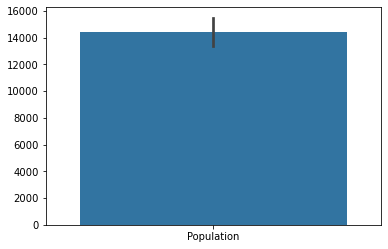

In [423]:
Barnstable_df[['City/Town', 'Population']].sort_values('Population', ascending=False)

<AxesSubplot:xlabel='City/Town', ylabel='Population'>

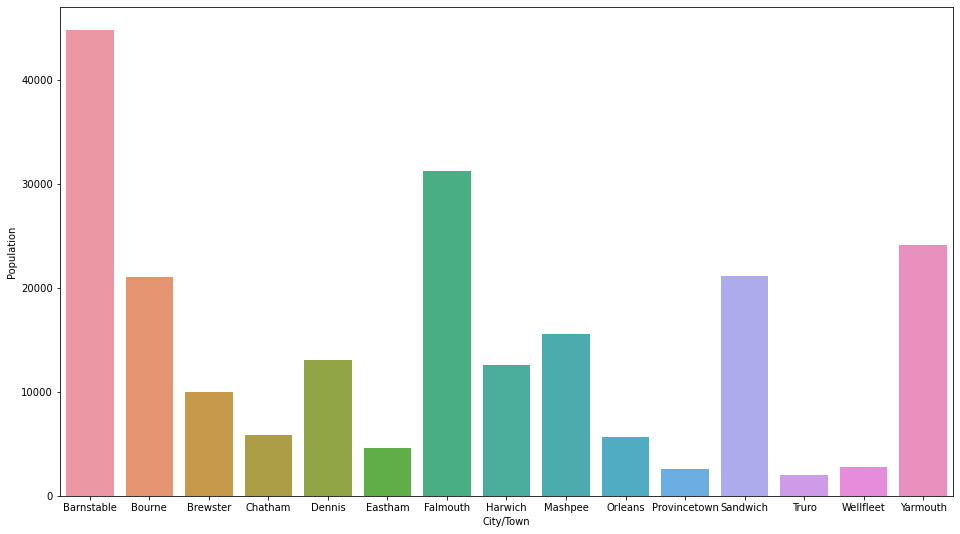

In [434]:
plt.figure(figsize=(16,9))
sns.barplot(data=Barnstable_df, x='City/Town', y='Population')

In [440]:
Barnstable_df.loc[Barnstable_df['Population'], Barnstable_df['City/Town']]

KeyError: "None of [Float64Index([  44772.5204478296,   21025.5302833235,   9926.46739931273,\n                5829.53447903184,   13087.7126354983,   4602.61502950431,\n                31190.3374670891,   12588.6400801333,   15535.1939863677,\n                5620.27871863707,\n              ...\n                4602.61502950431,   31190.3374670891,   12588.6400801333,\n                15535.1939863677,   5620.27871863707,   2582.83182035878,\n                21077.9581513104,   1968.13052799018,   2759.83426324726,\n              24061.696973528105],\n             dtype='float64', name='Report Date', length=480)] are in the [index]"

In [509]:
Barnstable_df

,Total Case Counts,City/Town,Population
Report Date,,,
2020-12-24,1531,Barnstable,44772.520448
2020-12-24,493,Bourne,21025.530283
2020-12-24,187,Brewster,9926.467399
2020-12-24,76,Chatham,5829.534479
2020-12-24,248,Dennis,13087.712635
...,...,...,...
2021-07-29,270,Provincetown,2582.83182
2021-07-29,1234,Sandwich,21077.958151
2021-07-29,80,Truro,1968.130528


In [402]:
all_but_provincetown = Barnstable_df[~(Barnstable_df['City/Town']=='Provincetown')]
province = Barnstable_df[Barnstable_df['City/Town']=='Provincetown']

No handles with labels found to put in legend.


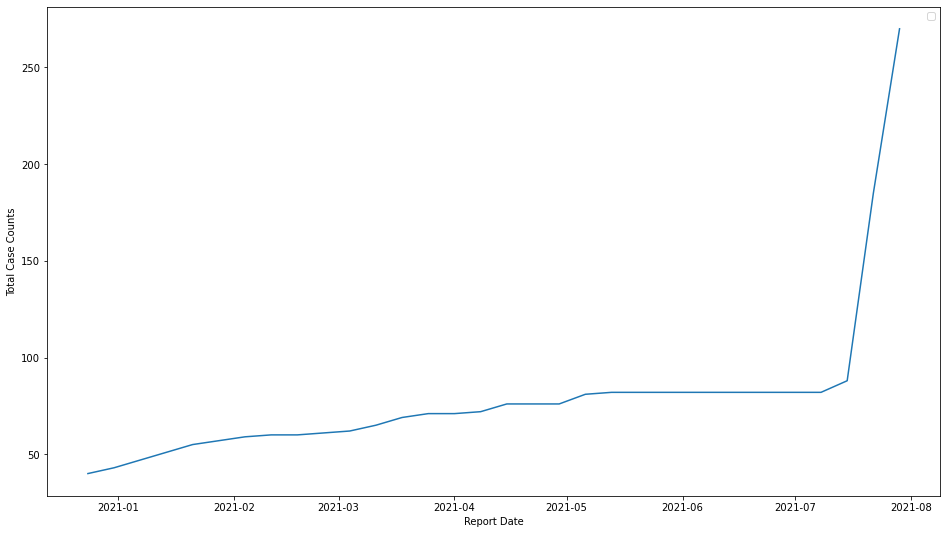

In [410]:
#sns.lineplot(data=df)
plt.figure(figsize=(16,9))
#sns.lineplot(data=all_but_provincetown, x=all_but_provincetown.index, y='Total Case Counts', hue='City/Town')
sns.lineplot(data=province, x=province.index, 
            y='Total Case Counts')
plt.legend()

<AxesSubplot:xlabel='Report Date', ylabel='Total Case Counts'>

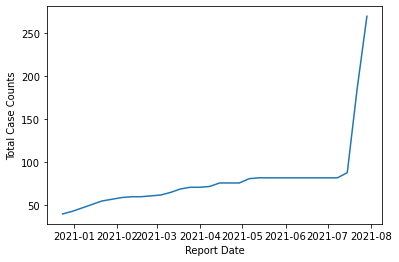

In [408]:
sns.lineplot(data=province, x=province.index, y='Total Case Counts')

In [366]:
df.tail(5)

,Total Case Counts
Report Date,
2021-07-01,82
2021-07-08,82
2021-07-15,88
2021-07-22,185
2021-07-29,270


In [450]:
first_dose_pct = [0.257,0.290,0.332,0.382,0.441,0.485,0.529,0.561,0.587,0.608,0.627,0.640,0.653,0.662,0.668,0.674,0.678,0.683,0.687,0.692]
fully_vaccinated_pct = [0.141,0.163,0.192,0.226,0.270,0.307,0.350,0.390,0.439,0.473,0.506,0.531,0.560,0.579,0.592,0.605,0.611,0.616,0.620,0.624]

In [445]:
pd.date_range(start='3/16/2021', end='7/27/2021', periods=20)

DatetimeIndex(['2021-03-16', '2021-03-23', '2021-03-30', '2021-04-06',
               '2021-04-13', '2021-04-20', '2021-04-27', '2021-05-04',
               '2021-05-11', '2021-05-18', '2021-05-25', '2021-06-01',
               '2021-06-08', '2021-06-15', '2021-06-22', '2021-06-29',
               '2021-07-06', '2021-07-13', '2021-07-20', '2021-07-27'],
              dtype='datetime64[ns]', freq=None)

In [449]:
the_date = [date for date in pd.date_range(start='3/16/2021', end='7/27/2021', periods=20)]


In [452]:
first_dose = (dict(zip(the_date, first_dose_pct)))

In [465]:
fully_vaxd = dict(zip(the_date, fully_vaccinated_pct))

In [471]:
vaccine_first = pd.DataFrame(list(first_dose.items()), columns=['Report Date', 'First Dose Pct'])

In [466]:
vaccine_full = pd.Series(list(fully_vaxd.items()), columns=['Report Date', 'Fully Vaxxed Pct'])

In [473]:
Vaccine_df = pd.merge(vaccine_first, vaccine_full)

In [474]:
Vaccine_df.set_index('Report Date', drop=True, inplace=True)

,Report Date,First Dose Pct,Fully Vaxxed Pct
0,2021-03-16,0.257,0.141
1,2021-03-23,0.290,0.163
2,2021-03-30,0.332,0.192
3,2021-04-06,0.382,0.226
4,2021-04-13,0.441,0.270
5,2021-04-20,0.485,0.307
6,2021-04-27,0.529,0.350
7,2021-05-04,0.561,0.390
8,2021-05-11,0.587,0.439
9,2021-05-18,0.608,0.473


In [480]:
Vaccine_df['First Dose Pct'] = Vaccine_df['First Dose Pct']*100

In [481]:
Vaccine_df['Fully Vaxxed Pct'] = Vaccine_df['Fully Vaxxed Pct']*100

[Text(0.5, 0, 'Report Date'), Text(0, 0.5, 'Percentage of State Population')]

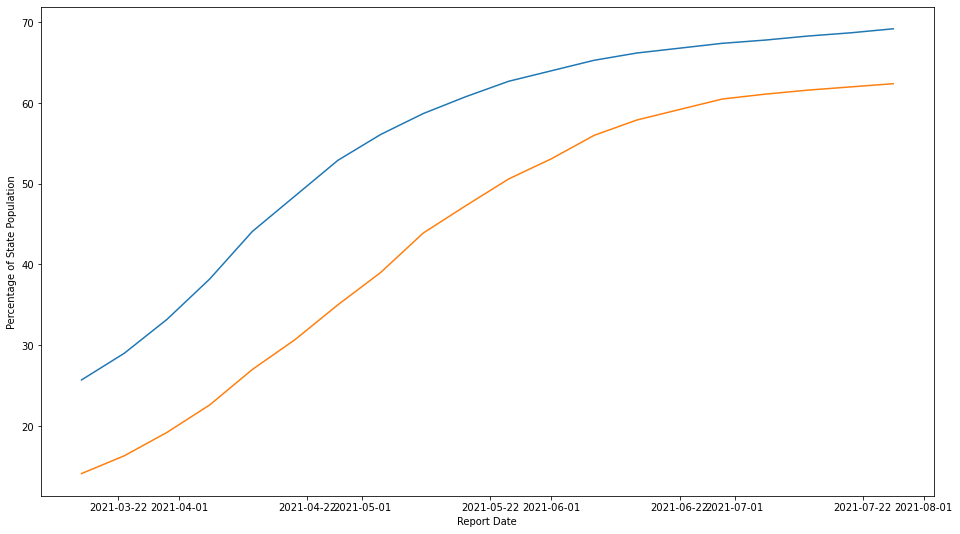

In [537]:
plt.figure(figsize=(16,9))
_ = sns.lineplot(data=Vaccine_df, x='Report Date', y='First Dose Pct')
_ = sns.lineplot(data=Vaccine_df, x='Report Date', y='Fully Vaxxed Pct')
_.set(xlabel='Report Date', ylabel='Percentage of State Population')

In [502]:
Barnstable_df['2021-03-16']

KeyError: '2021-03-16'

In [525]:
Barnstable_vaccine_slice = pd.DataFrame(Barnstable_df.loc[Barnstable_df.index == '2021-03-18'])

In [527]:
Barnstable_vaccine_slice = Barnstable_df[Barnstable_df.index.slice_indexer('2021-03-16', '2021-07-27')]

In [529]:
Barnstable_vaccine_slice = pd.DataFrame(Barnstable_vaccine_slice) 

In [532]:
Barnstable_vaccine_slice.reset_index(inplace=True)

In [533]:
Barnstable_vaccine_slice

,Report Date,Total Case Counts,City/Town,Population
0,2021-03-18,3283,Barnstable,44772.520448
1,2021-03-18,1077,Bourne,21025.530283
2,2021-03-18,392,Brewster,9926.467399
3,2021-03-18,276,Chatham,5829.534479
4,2021-03-18,601,Dennis,13087.712635
...,...,...,...,...
280,2021-07-22,185,Provincetown,2582.83182
281,2021-07-22,1223,Sandwich,21077.958151
282,2021-07-22,65,Truro,1968.130528
283,2021-07-22,81,Wellfleet,2759.834263


In [535]:
df1 = Barnstable_vaccine_slice.copy()
df1['Positive Percentage'] = (df1['Total Case Counts'] / df1['Population'])*100

In [536]:
df1

,Report Date,Total Case Counts,City/Town,Population,Positive Percentage
0,2021-03-18,3283,Barnstable,44772.520448,7.332623
1,2021-03-18,1077,Bourne,21025.530283,5.122344
2,2021-03-18,392,Brewster,9926.467399,3.949038
3,2021-03-18,276,Chatham,5829.534479,4.734512
4,2021-03-18,601,Dennis,13087.712635,4.592093
...,...,...,...,...,...
280,2021-07-22,185,Provincetown,2582.83182,7.162681
281,2021-07-22,1223,Sandwich,21077.958151,5.80227
282,2021-07-22,65,Truro,1968.130528,3.302626
283,2021-07-22,81,Wellfleet,2759.834263,2.934959


In [538]:
vaccine_df

,Report Date,First Dose Pct
0,2021-03-16,0.257
1,2021-03-23,0.290
2,2021-03-30,0.332
3,2021-04-06,0.382
4,2021-04-13,0.441
5,2021-04-20,0.485
6,2021-04-27,0.529
7,2021-05-04,0.561
8,2021-05-11,0.587
9,2021-05-18,0.608


In [546]:
Vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Report Date       20 non-null     datetime64[ns]
 1   First Dose Pct    20 non-null     float64       
 2   Fully Vaxxed Pct  20 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.2 KB


In [547]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Report Date          285 non-null    datetime64[ns]
 1   Total Case Counts    285 non-null    int32         
 2   City/Town            285 non-null    object        
 3   Population           285 non-null    object        
 4   Positive Percentage  285 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 10.1+ KB


In [551]:
df1['Positive Percentage'] = df1['Positive Percentage'].astype('float64')

In [555]:
df1['Population'] = df1['Population'].astype('int32')
df1['City/Town'] = df1['City/Town'].astype('category')

In [567]:
df1

,Report Date,Total Case Counts,City/Town,Population,Positive Percentage
0,2021-03-18,3283,Barnstable,44772,7.332623
1,2021-03-18,1077,Bourne,21025,5.122344
2,2021-03-18,392,Brewster,9926,3.949038
3,2021-03-18,276,Chatham,5829,4.734512
4,2021-03-18,601,Dennis,13087,4.592093
...,...,...,...,...,...
280,2021-07-22,185,Provincetown,2582,7.162681
281,2021-07-22,1223,Sandwich,21077,5.802270
282,2021-07-22,65,Truro,1968,3.302626
283,2021-07-22,81,Wellfleet,2759,2.934959


Text(0.5, 1.0, 'Population Percentage of Covid-19 Positive Tests')

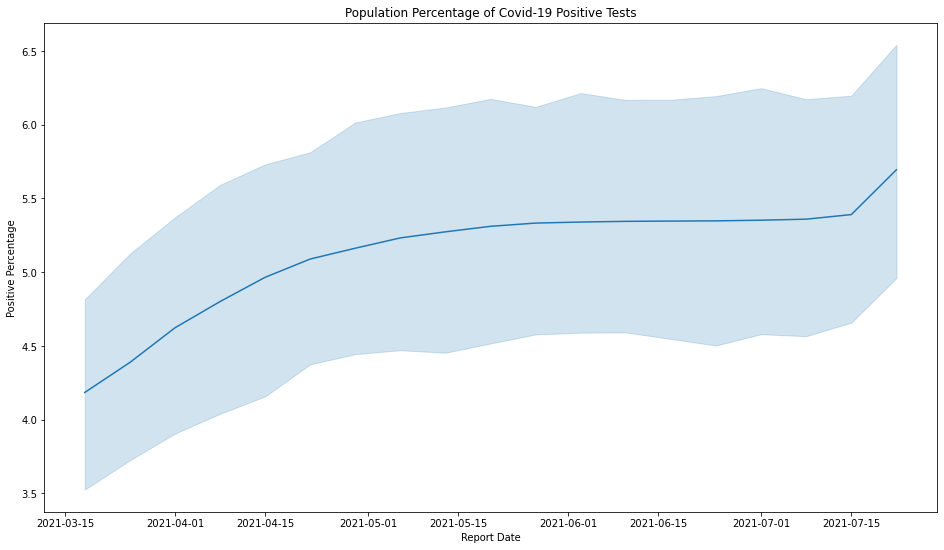

In [568]:
plt.figure(figsize=(16,9))
#sns.lineplot(data=Vaccine_df, x='Report Date', y='First Dose Pct')
sns.lineplot(data=df1, x='Report Date', y='Positive Percentage')
plt.title('Population Percentage of Covid-19 Positive Tests')

Text(0.5, 1.0, 'Barnstable County Covid-19 Positive Population Percentage')

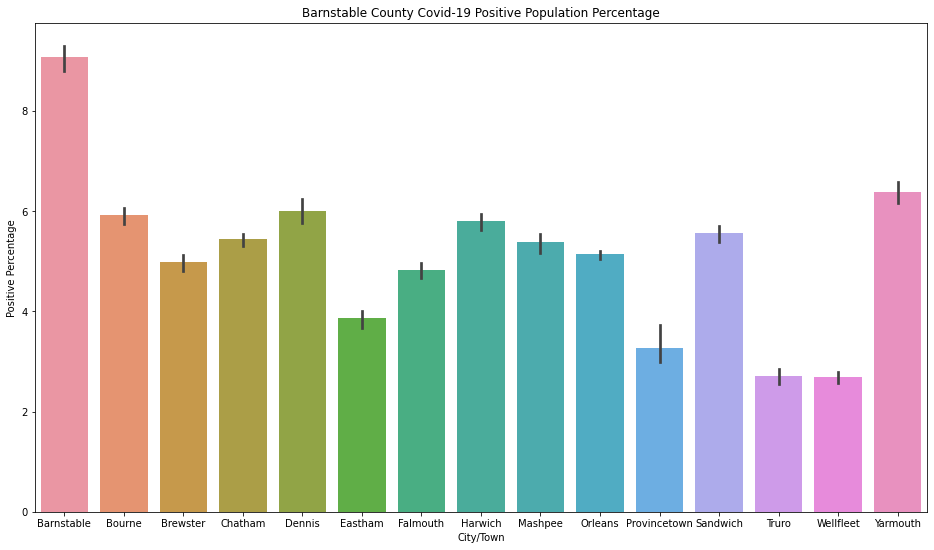

In [571]:
plt.figure(figsize=(16,9))
sns.barplot(data=df1, x='City/Town', y='Positive Percentage')
plt.title('Barnstable County Covid-19 Positive Population Percentage')

<AxesSubplot:xlabel='Report Date', ylabel='Total Case Counts'>

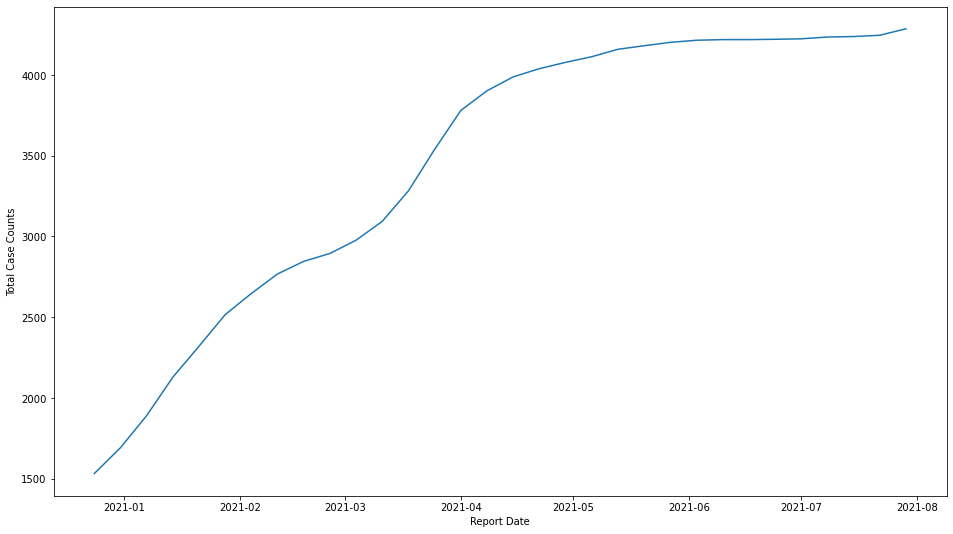

In [560]:
barnstable = Barnstable_df[Barnstable_df['City/Town']=='Barnstable']
plt.figure(figsize=(16,9))
sns.lineplot(data=barnstable, x=barnstable.index, y='Total Case Counts')

<AxesSubplot:xlabel='Report Date', ylabel='Total Case Counts'>

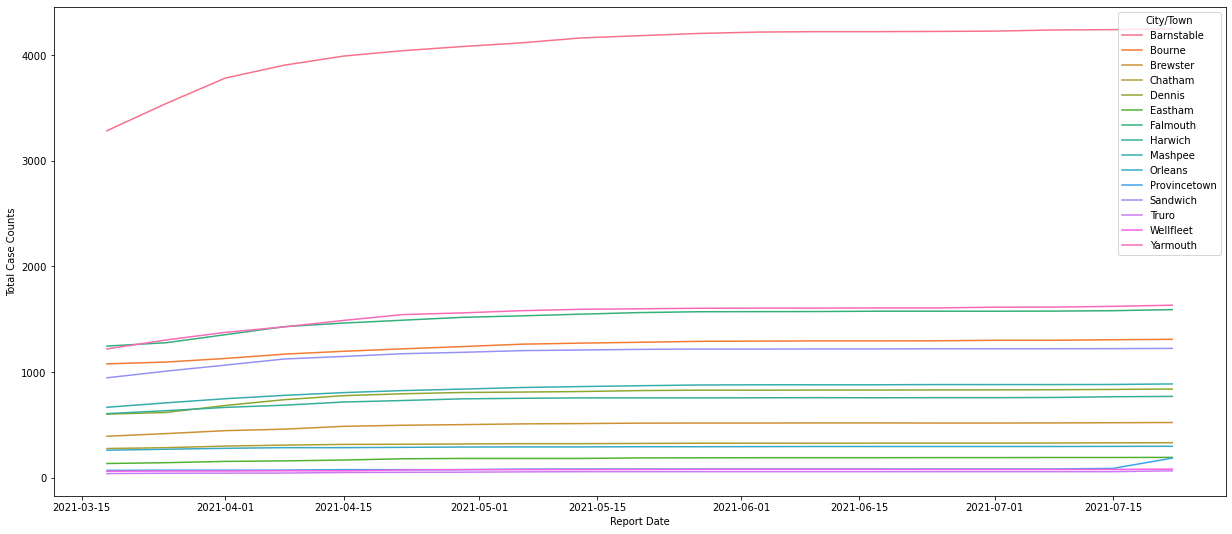

In [580]:
plt.figure(figsize=(21,9))
sns.lineplot(data=df1, x='Report Date', y='Total Case Counts', hue='City/Town')

Text(0.5, 1.0, 'Population of the cities of Barnstable County')

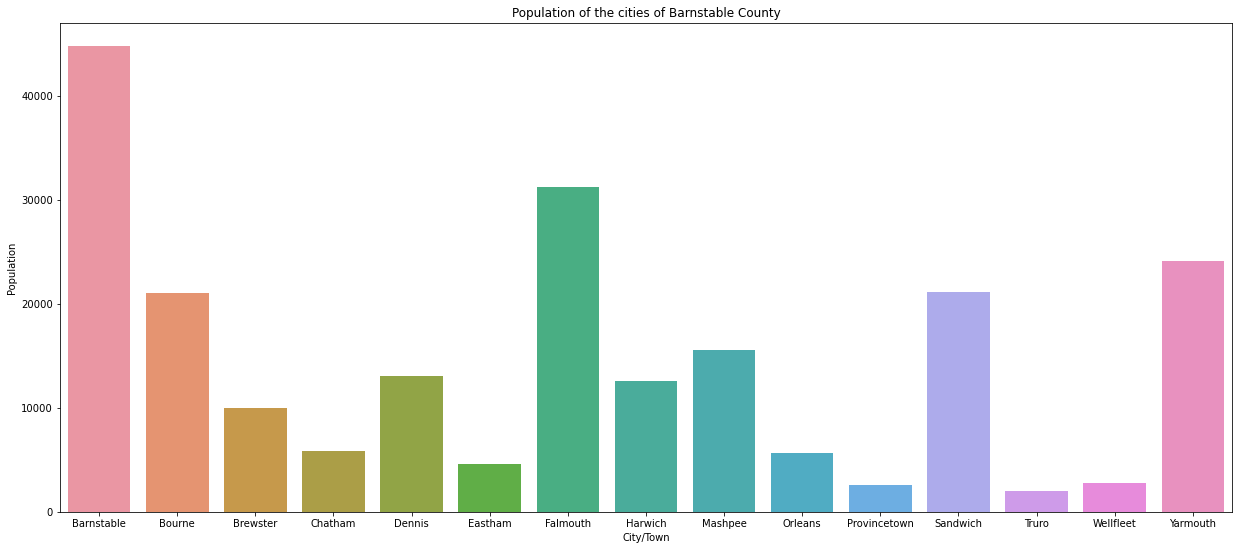

In [587]:
plt.figure(figsize=(21,9))
sns.barplot(data=df1, x='City/Town', y='Population')
plt.title('Population of the cities of Barnstable County')